## DATA IMPORT

In [1]:
from DATA import NARMA10

narma = NARMA10(True, [60,0,40])

X_TR, Y_TR = narma.TR()
X_VAL, Y_VAL = narma.VAL()
X_TS, Y_TS = narma.TS()

In [2]:
print(X_TR.shape, Y_TR.shape)
print(X_VAL.shape, Y_VAL.shape)
print(X_TS.shape, Y_TS.shape)

torch.Size([6000]) torch.Size([6000])
torch.Size([0]) torch.Size([0])
torch.Size([4000]) torch.Size([4000])


## ESN (No IP)

In [2]:
from ESN import Reservoir, EchoStateNetwork

network = EchoStateNetwork(Reservoir(1, 1000, ro_rescale=0.85, sparsity=0.7))

In [3]:
network.train(X_TR, Y_TR, 0.25, transient=100)

torch.Size([5900])


[0.8377087613917239, 0.008633020227885025, 0.5212542788695973]


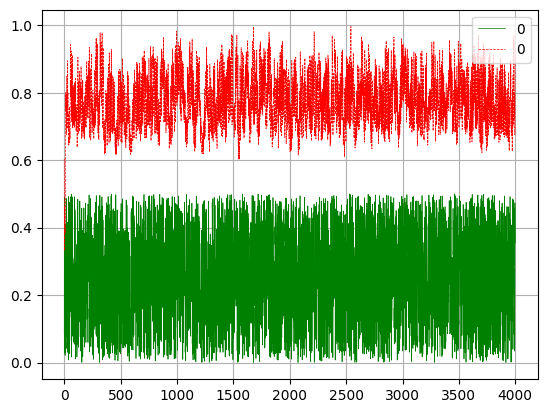

In [4]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

In [5]:
network.MC(X_TR, 200)

1.7109609303800066

## Classic IP ESN (Normal Distribution)

In [2]:
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,10, sparsity=0.9, ro_rescale=0.5)

ip_mask = IPMask.normalMask(10)

ip_reservoir.set_IP_mask(ip_mask)

In [3]:
ip_reservoir.pre_train_batch(X_TR, 0.00025)

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autograd\__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\autograd\engine.cpp:1156.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [5]:
ip_reservoir.predict(X_TR, False, True)

tensor([[ 0.1928, -0.2405,  0.1079,  ..., -0.1474, -0.0619, -0.2596],
        [ 0.1675, -0.2405,  0.2861,  ..., -0.3071, -0.2481, -0.3048],
        [ 0.2312, -0.2405,  0.2766,  ..., -0.2371, -0.2199, -0.3066],
        ...,
        [ 0.0643,  0.1285,  0.0364,  ...,  0.2129,  0.2590,  0.2528],
        [ 0.0850,  0.0735,  0.0464,  ...,  0.0992,  0.2024,  0.1800],
        [ 0.1128, -0.0173,  0.0804,  ...,  0.0162,  0.1151,  0.0506]],
       grad_fn=<CopySlices>)

In [6]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (0.07380308955907822)  ACTUAL_STD == (0.05112731084227562)][ TARGET_MEAN == (-0.020974595099687576) TARGET_STD == (1.0010677576065063)]
Unit - (2): [ ACTUAL_MEAN == (0.12023301422595978)  ACTUAL_STD == (0.11441129446029663)][ TARGET_MEAN == (-0.004855447448790073) TARGET_STD == (0.9904016852378845)]
Unit - (3): [ ACTUAL_MEAN == (0.05742470175027847)  ACTUAL_STD == (0.08546788990497589)][ TARGET_MEAN == (0.027012547478079796) TARGET_STD == (1.0137587785720825)]
Unit - (4): [ ACTUAL_MEAN == (-0.1650444120168686)  ACTUAL_STD == (0.15624535083770752)][ TARGET_MEAN == (-0.013915954157710075) TARGET_STD == (0.9991298913955688)]
Unit - (5): [ ACTUAL_MEAN == (-0.054562486708164215)  ACTUAL_STD == (0.1647689938545227)][ TARGET_MEAN == (0.00014711191761307418) TARGET_STD == (1.005312204360962)]
Unit - (6): [ ACTUAL_MEAN == (0.11777544021606445)  ACTUAL_STD == (0.12369409203529358)][ TARGET_MEAN == (0.017848823219537735) TARGET_STD == (0.9948422908782959)]
Unit - (7):

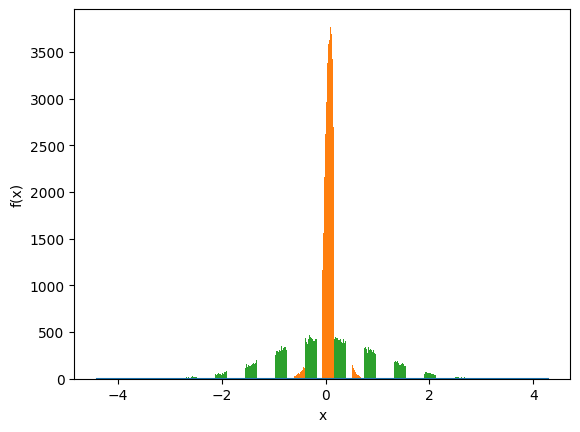

In [7]:
ip_reservoir.plot_overall_activation_distribution(True)

In [13]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.15)

No transient applied. Reservoir was already warmed up
torch.Size([6000])


[0.7135432037280902, 0.0024675277578983484, 0.13156967933166253]


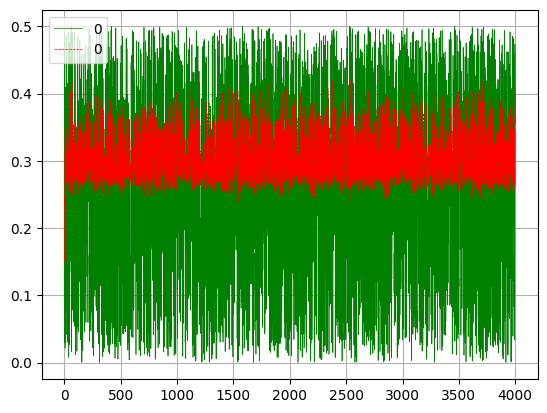

In [14]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

## Critical IP ESN (Alternate Positive and Negative Gaussian Distribution)


In [22]:
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,100, sparsity=0.9, ro_rescale=0.5)

ip_mask = IPMask.mixedBimodalMask(100)

ip_reservoir.set_IP_mask(ip_mask)

In [23]:
ip_reservoir.pre_train_batch(X_TR, 0.00025, epochs=5, transient=100, verbose=True)

- Epoch: 1) | KL Divergence value: 2047.858642578125.
- Epoch: 2) | KL Divergence value: 1635.1055908203125.
- Epoch: 3) | KL Divergence value: 1541.66943359375.
- Epoch: 4) | KL Divergence value: 1495.044921875.
- Epoch: 5) | KL Divergence value: 1458.7955322265625.


In [24]:
ip_reservoir.IP_loss

tensor(1458.7955, grad_fn=<SumBackward0>)

In [25]:
ip_reservoir.predict(X_TR, False, True)

tensor([[ 0.2235, -0.4405, -0.1523,  ..., -0.0682, -0.0967,  0.0223],
        [ 0.1389, -0.2435, -0.1842,  ..., -0.0575,  0.0892, -0.0794],
        [-0.0451, -0.1661, -0.3297,  ..., -0.0701, -0.0914, -0.1230],
        ...,
        [-0.1312, -0.7619,  0.5006,  ...,  0.4012,  0.1006,  0.2029],
        [-0.1235, -0.8138,  0.5085,  ...,  0.3049, -0.1707,  0.2081],
        [ 0.0639, -0.6364,  0.3431,  ...,  0.3119, -0.1418,  0.1242]],
       grad_fn=<CopySlices>)

In [26]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (-0.10297282785177231)  ACTUAL_STD == (0.08722586929798126)][ TARGET_MEAN == (-0.9156477451324463) TARGET_STD == (0.5752598643302917)]
Unit - (2): [ ACTUAL_MEAN == (-1.0833426713943481)  ACTUAL_STD == (0.24117834866046906)][ TARGET_MEAN == (0.9216381311416626) TARGET_STD == (0.5874242782592773)]
Unit - (3): [ ACTUAL_MEAN == (0.5632771253585815)  ACTUAL_STD == (0.2393161952495575)][ TARGET_MEAN == (-0.9119912385940552) TARGET_STD == (0.5816453695297241)]
Unit - (4): [ ACTUAL_MEAN == (0.049873046576976776)  ACTUAL_STD == (0.2282247096300125)][ TARGET_MEAN == (0.9238787889480591) TARGET_STD == (0.5818158388137817)]
Unit - (5): [ ACTUAL_MEAN == (-0.2012334167957306)  ACTUAL_STD == (0.18868796527385712)][ TARGET_MEAN == (-0.9351516962051392) TARGET_STD == (0.5836934447288513)]
Unit - (6): [ ACTUAL_MEAN == (0.4414363503456116)  ACTUAL_STD == (0.17928335070610046)][ TARGET_MEAN == (0.9175199866294861) TARGET_STD == (0.58504718542099)]
Unit - (7): [ ACTUAL_MEAN == 

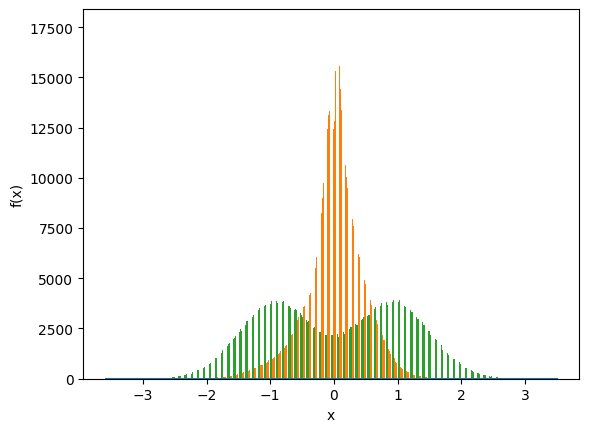

In [27]:
ip_reservoir.plot_overall_activation_distribution(True)

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [30]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.025)

No transient applied. Reservoir was already warmed up
torch.Size([6000])


[0.8149847575830531, 0.005702974132367172, 0.2888246043079213]


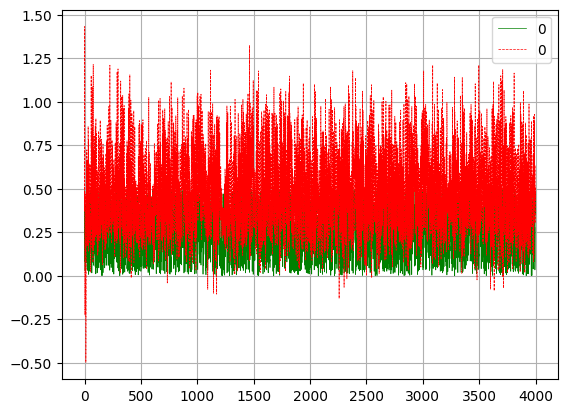

In [31]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

## Critical IP ESN (Mixture of Gaussian)


In [5]:
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,100, sparsity=0.9, ro_rescale=0.5)

ip_mask = IPMask.fullBimodalMask(100)

ip_reservoir.set_IP_mask(ip_mask)

In [6]:
ip_reservoir.pre_train_batch(X_TR, 0.00025, epochs=5, transient=100, verbose=True)

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autograd\__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\autograd\engine.cpp:1156.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


- Epoch: 1) | KL Divergence value: 1637.2882080078125.
- Epoch: 2) | KL Divergence value: 1627.7181396484375.
- Epoch: 3) | KL Divergence value: 1618.28759765625.
- Epoch: 4) | KL Divergence value: 1608.99658203125.
- Epoch: 5) | KL Divergence value: 1599.84912109375.


In [7]:
ip_reservoir.predict(X_TR, False, True)

tensor([[ 0.0273, -0.0367,  0.1094,  ..., -0.0748, -0.1908,  0.0944],
        [ 0.0263, -0.0622,  0.0724,  ..., -0.0307, -0.0261, -0.0229],
        [-0.0086, -0.0859, -0.0010,  ...,  0.0569,  0.0042,  0.0180],
        ...,
        [-0.4895,  0.3835, -0.0057,  ..., -0.3926,  0.2840, -0.4309],
        [-0.4409,  0.3287,  0.0194,  ..., -0.3586,  0.1992, -0.3469],
        [-0.3097,  0.2321,  0.0375,  ..., -0.2775,  0.1043, -0.2356]],
       grad_fn=<CopySlices>)

In [8]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (-0.5365757942199707)  ACTUAL_STD == (0.1782892346382141)][ TARGET_MEAN == (0.005889509804546833) TARGET_STD == (1.0919808149337769)]
Unit - (2): [ ACTUAL_MEAN == (0.39440637826919556)  ACTUAL_STD == (0.13615089654922485)][ TARGET_MEAN == (-0.009830091148614883) TARGET_STD == (1.0814040899276733)]
Unit - (3): [ ACTUAL_MEAN == (-0.010352210141718388)  ACTUAL_STD == (0.05348427966237068)][ TARGET_MEAN == (0.013622465543448925) TARGET_STD == (1.0845308303833008)]
Unit - (4): [ ACTUAL_MEAN == (0.2893264591693878)  ACTUAL_STD == (0.08199836313724518)][ TARGET_MEAN == (0.004904876928776503) TARGET_STD == (1.0905041694641113)]
Unit - (5): [ ACTUAL_MEAN == (-0.031415704637765884)  ACTUAL_STD == (0.015993904322385788)][ TARGET_MEAN == (-0.007015409879386425) TARGET_STD == (1.0924046039581299)]
Unit - (6): [ ACTUAL_MEAN == (0.19761419296264648)  ACTUAL_STD == (0.05908362567424774)][ TARGET_MEAN == (-0.006703848019242287) TARGET_STD == (1.0854597091674805)]
Unit - (7)

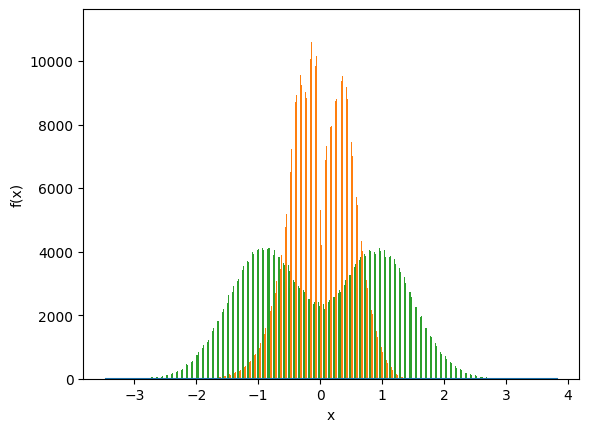

In [9]:
ip_reservoir.plot_overall_activation_distribution(True)

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [14]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.025)

No transient applied. Reservoir was already warmed up
torch.Size([6000])


[1.1254296539777766, 0.019394387168563905, 1.2059691850905803]


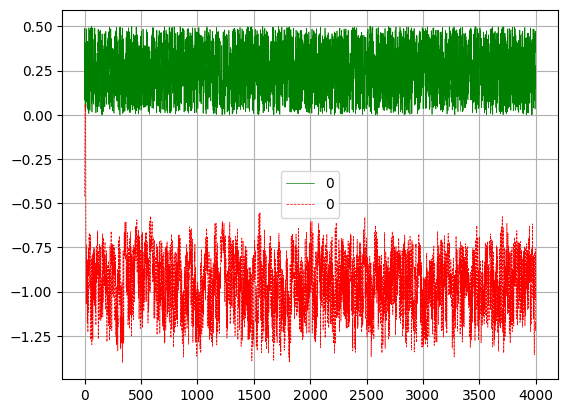

In [15]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

## [BIASED] Critical IP ESN (Mixture of Gaussian)

In [2]:

from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1, 100, 1, bias=True)

ip_mask = IPMask.fullBimodalMask(100)

ip_reservoir.set_IP_mask(ip_mask)

In [6]:
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,10, sparsity=0.9, ro_rescale=0.5, bias=True)

ip_mask = IPMask.mixedBimodalMask(10)

ip_reservoir.set_IP_mask(ip_mask)

In [7]:
ip_reservoir.pre_train_batch(X_TR, 0.00025, epochs=5, transient=100, verbose=True)

- Epoch: 1) | KL Divergence value: 1940.552490234375.
- Epoch: 2) | KL Divergence value: 1747.650146484375.
- Epoch: 3) | KL Divergence value: 1677.5604248046875.
- Epoch: 4) | KL Divergence value: 1635.94775390625.
- Epoch: 5) | KL Divergence value: 1607.07275390625.


In [8]:
ip_reservoir.predict(X_TR, False, True)

tensor([[ 0.9628,  0.9943, -0.4065,  ...,  0.5105, -0.2826,  0.5119],
        [ 0.8555,  0.9941, -0.4836,  ...,  0.7059, -0.2826,  0.4486],
        [ 0.9030,  0.9941, -0.4836,  ...,  0.7059, -0.2826,  0.4670],
        ...,
        [ 0.9402,  0.9971, -0.7907,  ...,  0.7151, -0.2520,  0.5105],
        [ 0.9313,  0.9968, -0.7555,  ...,  0.6832, -0.2566,  0.5163],
        [ 0.9326,  0.9961, -0.6900,  ...,  0.6536, -0.2640,  0.5148]],
       grad_fn=<CopySlices>)

In [9]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (1.636063814163208)  ACTUAL_STD == (0.3162614405155182)][ TARGET_MEAN == (-0.9241871237754822) TARGET_STD == (0.5782206058502197)]
Unit - (2): [ ACTUAL_MEAN == (3.2643489837646484)  ACTUAL_STD == (0.11965321749448776)][ TARGET_MEAN == (0.9223059415817261) TARGET_STD == (0.5839726328849792)]
Unit - (3): [ ACTUAL_MEAN == (-1.0616655349731445)  ACTUAL_STD == (0.179128497838974)][ TARGET_MEAN == (-0.9211187362670898) TARGET_STD == (0.5786258578300476)]
Unit - (4): [ ACTUAL_MEAN == (-1.3733203411102295)  ACTUAL_STD == (0.00984165444970131)][ TARGET_MEAN == (0.9233965277671814) TARGET_STD == (0.5859478116035461)]
Unit - (5): [ ACTUAL_MEAN == (-1.2378928661346436)  ACTUAL_STD == (0.08420409262180328)][ TARGET_MEAN == (-0.9217237234115601) TARGET_STD == (0.5735360980033875)]
Unit - (6): [ ACTUAL_MEAN == (0.6818638443946838)  ACTUAL_STD == (0.15057311952114105)][ TARGET_MEAN == (0.9196984767913818) TARGET_STD == (0.5851269364356995)]
Unit - (7): [ ACTUAL_MEAN == (6.

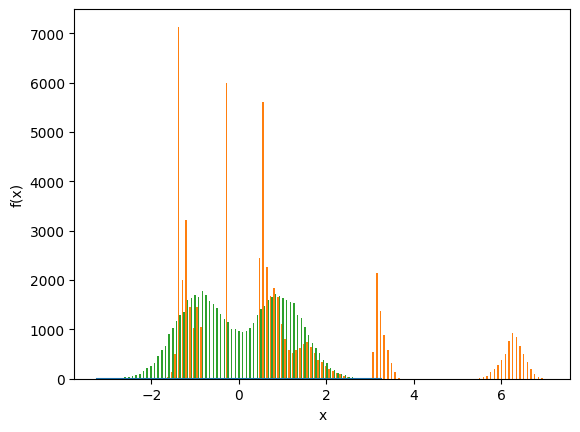

In [10]:
ip_reservoir.plot_overall_activation_distribution(True)

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [17]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.05)

No transient applied. Reservoir was already warmed up
torch.Size([6000])


[0.7538544608132656, 0.004422774394303389, 0.2395475672425051]


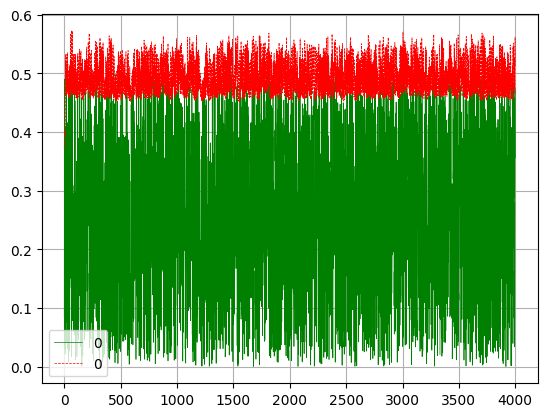

In [18]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])